In [3]:
import random
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [14, 7]
sns.set_palette('Set2')

In [4]:
tags = ['ADJ','ADP','ADV','AUX','CONJ','DET','INTJ','NOUN',' NUM','PART','PRON','PROPN','PUNCT','SCONJ','SYM','VERB']
stanford_tag_count = [406,986,171,202,159,805,4,1192,98,1,261,580,679,124,9,497]
spacy_tag_count = [410,987,178,204,161,804,2,1185,106,1,242,583,681,121,8,499]
udpipe_tag_count = [408,985,171,183,160,782,1,1159,97,1,281,618,630,120,6,512]

6174 6172 6114


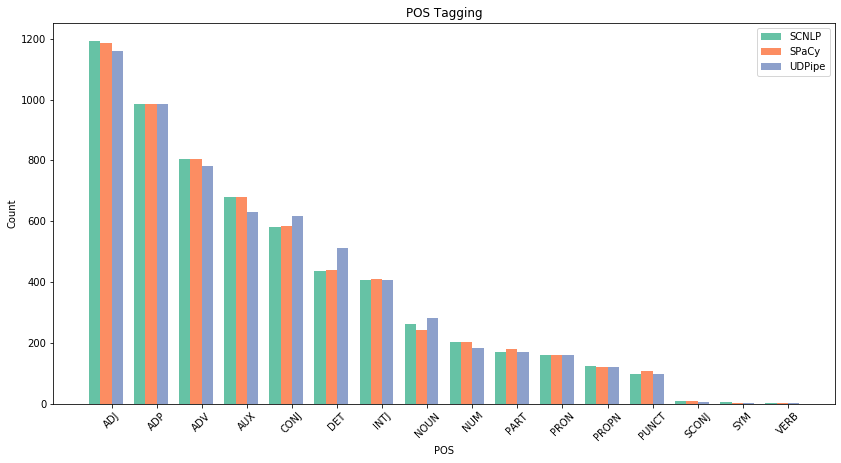

In [20]:
def expand_tags(tags, tag_count):
    expanded_tags = []
    for t, count in zip(tags, tag_count):
        expanded_tags += [t] * count
    return expanded_tags

stanford_tags = expand_tags(tags, stanford_tag_count)
spacy_tags = expand_tags(tags, spacy_tag_count)
udpipe_tags = expand_tags(tags, udpipe_tag_count)

print(len(stanford_tags), len(spacy_tags), len(udpipe_tags))

s = "SCNLP|SpaCy|UDPipe".split("|")

j = {'SCNLP': stanford_tags[:6114], 'SpaCy': spacy_tags[:6114], 'UDPipe': udpipe_tags[:6114]}
df = pd.DataFrame(j)

index = np.arange(len(tags))
bar_width = 0.25

fig, ax = plt.subplots()
stanford = ax.bar(index, df["SCNLP"].value_counts(), bar_width,
                label="SCNLP")

spacy = ax.bar(index+bar_width, df["SpaCy"].value_counts(),
                 bar_width, label="SPaCy")

udpipe = ax.bar(index+2*bar_width, df["UDPipe"].value_counts(),
                 bar_width, label="UDPipe")

ax.set_xlabel('POS')
ax.set_ylabel('Count')
ax.set_title('POS Tagging')
ax.set_xticks(index + (3*bar_width) / 2)
ax.set_xticklabels(tags, rotation=45)
ax.legend()

plt.show()